# Jupyter Notebook pour des prédictions législatives

## 1. Constantes

In [1]:
TABLE_LEGISLATIVES = {
    "DXG" : "Marxistes/Divers Extrèmes gauche",
    "NUP" : "Nupes",
    "PS" : "Parti Socialiste",
    "LLR" : "Lassale",

    "REG" : "Régionaliste",
    "EXG" : "Extrème gauche",
    "UG" : "Union de la gauche",
    "RDG" : "Parti radical de gauche",
    "ENS" : "Ensemble (majorité présidentielle)",
    "HOZ" : "Horizons",
    "UDI" : "Union des démocrates et indépendants",
    "ECO" : "Ecologistes",
    "RN" : "Rassemblement National",
    "LR" : "Les Républicains",
    "UXD" : "Union Extrème droite (Ciotti)",
    "DSV" : "Droite souverainiste",
    "REC" : "Reconquête",
    "EXD" : "Extrème droite",
    "DVG" : "Divers gauche",
    "DVD" : "Divers droite",
    "DVC" : "Divers centre",
    "DIV" : "Divers",
}

TABLE_EUROPEENNES = {
    "PARTI REVOLUTIONNAIRE COMMUNISTES" : "UG",
    "FREE PALESTINE" : "UG",
    "HUMANITE SOUVERAINE" : "UG",
    "PAIX ET DECROISSANCE" : "UG",
    "POUR UNE DEMOCRATIE REELLE : DECIDONS NOUS-MEMES !" : "UG",
    "NON À L'UE ET À L'OTAN, COMMUNISTES POUR LA PAIX ET LE PROGRÈS SOCIAL" : "UG",
    "LUTTE OUVRIERE" : "UG",
    "URGENCE REVOLUTION !" : "UG",
    "LFI - UP" : "UG",
    '"POUR LE PAIN, LA PAIX, LA LIBERTÉ !" PRÉSENTÉE PAR LE PARTI DES TRAVAILLEURS' : "UG",
    "PARTI ANIMALISTE" : "UG",
    "PACE" : "UG",
    "GAUCHE UNIE" : "UG",
    "REVEIL EUR" : "PS",
    "EUROPE ÉCOLOGIE" : "EELV",
    "ÉQUINOXE" : "ECO",
    "ECOLOGIE POSITIVE" : "ECO",
    "EUROPE TERRITOIRES ÉCOLOGIE" : "ECO",
    "ÉCOLOGIE AU CENTRE" : "ECO",
    "BESOIN D'EUROPE" : "ENS",
    "LA DROITE POUR FAIRE ENTENDRE LA VOIX DE LA FRANCE EN EUROPE" : "LR",
    "LA RUCHE CITOYENNE" : "DVC",
    "DEMOCRATIE REPRESENTATIVE" : "DVC",
    "PARTI PIRATE" : "DVC",
    "LRN" : "RN",
    "FORTERESSE EUROPE": "DVD",
    "LIBERTÉ DÉMOCRATIQUE FRANÇAISE" : "DVD",
    "PPL" : "DVD",
    "LR" : "LR",
    "La FRANCE REVIENT" : "RN",
    "LA FRANCE FIERE, MENEE PAR MARION MARECHAL ET SOUTENUE PAR ÉRIC ZEMMOUR" : "REC",
    "L'EUROPE CA SUFFIT !" : "DSV",
    "LISTE ASSELINEAU-FREXIT" : "DSV",
    "POUR UNE AUTRE EUROPE" : "DIV",
    "NOUS LE PEUPLE" : "DIV",
    "PRENONS-NOUS EN MAIN" : "DIV",
    "CHANGER L'EUROPE" : "DIV",
    "FRANCE LIBRE" : "DIV",
    "DEFENDRE LES ENFANTS" : "DIV",
    "ESPERANTO" : "DIV",
    "NLP" : "DIV",
    "EAC" : "DIV",
    "AR" : "LLR",
}

## 2. Data

### 2.1 Importer la data

In [2]:
import pandas as pd
import numpy as np

# import data
df = pd.read_excel('../data/leg_tour_2.xlsx')
df_leg_1 = pd.read_excel('../data/leg_tour_1.xlsx')
df_euro = pd.read_excel('../data/europeennes_circ.xlsx')
df_liste_candidats = pd.read_csv("../data/candidatures_leg_2024.csv")


### 2.2 Traitement de la data législative

In [3]:
# Identify the candidate that lost
df['win_party'] = df.apply(lambda row: row["Nuance_2"] if row['Siege_1'] != 'Elu' else row["Nuance_1"], axis=1)
df_leg_1["Code de la circonscription"] = df_leg_1["Code de la circonscription"].astype(str).str.zfill(2)
print(df["win_party"].value_counts())

win_party
ENS    245
NUP    127
RN      88
LR      60
DVG     23
DVD     10
REG     10
DVC      4
UDI      3
DSV      1
DIV      1
Name: count, dtype: int64


### 2.3 Traitement de la data européenne

In [4]:
df_euro['win_party'] = ""
for index, row in df_euro.iterrows():
    win_party = row["Libellé abrégé de liste 1"]
    max_voix = -1
    for i in range (1, 39):
        if row[f"Voix {i}"] > max_voix:
            max_voix = row[f"Voix {i}"]
            win_party = row[f"Libellé abrégé de liste {i}"]
    df_euro.loc[index, "win_party"] = win_party
print(df_euro["win_party"].value_counts())
df_euro["Code circonscription législative"] = df_euro["Code circonscription législative"].astype(str).str.zfill(4)

win_party
La FRANCE REVIENT                                                          457
LFI - UP                                                                    48
BESOIN D'EUROPE                                                             39
REVEIL EUR                                                                  30
LA DROITE POUR FAIRE ENTENDRE LA VOIX DE LA FRANCE EN EUROPE                 2
LA FRANCE FIERE, MENEE PAR MARION MARECHAL ET SOUTENUE PAR ÉRIC ZEMMOUR      1
Name: count, dtype: int64


### 2.4 Récupérer les candidats LFI

In [5]:
import requests
from bs4 import BeautifulSoup

url = "https://lafranceinsoumise.fr/2024/06/14/candidats-legislatives-2024/"

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
}

response = requests.get(url, headers=headers)

soup = BeautifulSoup(response.text, 'html.parser')

tables = pd.read_html(str(soup))

# The tables variable is a list of DataFrames, one for each table on the webpage.
# You can access the first table like this:
df_candidats_LFI = tables[0]
print(df_candidats_LFI.head())

   Circo Numéro de circonscription       Nom du département Prénom candidat·e  \
0  01-03                        3e                      Ain         Christian   
1  01-05                        5e                      Ain          Florence   
2  02-02                        2e                    Aisne       Anne-Sophie   
3  03-02                        2e                   Allier            Louise   
4  04-02                        2e  Alpes-de-Haute-Provence               Léo   

  Nom candidat·e    Qualité Prénom suppléant·e Nom suppléant·e   Qualité.1  
0          JOLIE   Candidat               Lisa            WILD  Suppléante  
1         PISANI  Candidate             Pascal          BAUDET   Suppléant  
2     DUJANCOURT  Candidate             Didier         LATAPIE   Suppléant  
3       HÉRITIER  Candidate       Marie-Claude        MONCELON   Suppléant  
4         WALTER   Candidat              Alice         ALLAMEL  Suppléante  


/tmp/ipykernel_170656/2907941050.py:14: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(str(soup))


### 2.5 Récupérer la data sur quelle commune est où

In [6]:
import json

df_circ_map = pd.read_csv('../data/map_circonscriptions.csv')
with open('../data/communes.json') as f:
    communes_data = json.load(f)
communes_df = pd.DataFrame(communes_data)

## 3. Elections

### 3.1 Préparer les candidats

### Hypothèse

#### à Gauche

Le PS présente partout là il a gagné les européennes
Les verts présentent là où ils ont gagné les européennes
Le reste c LFI

#### La droite

LR tous les sortants sont remis
RN le reste
Reconquête le reste aussi

In [7]:
# Create a new DataFrame with the specified columns
def create_df_candidats(ALLIANCES_PARTY, df, df_euro, df_candidats, columns, TABLE_EUROPEENNES):
    # Create a new DataFrame with the specified columns
    # les colonnes doivent aller de candidat_1 à candidat_8, votes_1 à votes_8, id_candidat_1 à id_candidat_8
    #doivent également inlure id_circ, et nb_candidats
    rows = []

    # Create the new rows
    for index, row in df_liste_candidats.iterrows():
        # Report des codes d'outre mer pour être valides
        def report_outre_mer(code):
            code = str(code)
            if code == "971":
                return "ZA"
            if code == "972":
                return "ZB"
            if code == "974":
                return "ZD"
            if code == "975":
                return "ZS"
            if code == "976":
                return "ZM"
            if code == "986":
                return "ZW"
            if code == "987":
                return "ZP"
            if code == "988":
                return "ZN"
            if len(code) == 1:
                return code.zfill(2)
            return code
        id_init = str(row["circonscription"])
        id_circ =  str(report_outre_mer(id_init[:-2])) +"0"+ str(id_init)[-2:]
        
        existing_row = next((r for r in rows if r["id_circ"] == id_circ), None)

        if existing_row:
            # If a row with the given id_circ exists, modify it
            existing_row[f"id_candidat_{existing_row['nb_candidats']+1}"] = row["id"]          
            existing_row[f"candidat_{existing_row['nb_candidats']+1}"] = row["codeNuance"]
            existing_row[f"votes_{existing_row['nb_candidats']+1}"] = 0
            existing_row["nb_candidats"] += 1
        else:
            # If no row with the given id_circ exists, create a new one
            new_row = {column: "" if "Votes" not in column else 0 for column in columns}
            new_row["id_circ"] = id_circ
            new_row["id_leg"] = id_init
            new_row["nb_candidats"] = 1
            new_row["id_candidat_1"] = row["id"]
            new_row["candidat_1"] = row["codeNuance"]
            new_row["votes_1"] = 0
            rows.append(new_row)
    df_candidats = pd.DataFrame(rows, columns=columns)

    return df_candidats

### 3.2 Premier tour

Pour ça, on se focalise uniquement sur ça :
On regarde le nombre d'électeurs qui ont voté aux européennes, ceux là ne changeront pas leur vote
On regarde ensuite le nombre d'électeurs qui ont voté aux législatives, on fait une différence, et on prend leur vote, qu'on ajoute (on considère qu'ils vont se bouger le cul pour les législatives)

In [8]:
def premier_tour(df_candidats, df_leg_1, df_euro, TABLE_EUROPEENNES, ALLIANCES_PARTY,TABLEAU_INDEX, pourcentage_europeennes=0.5, pourcentage_LR_RN=0.6, pourcentage_ciotti=0.6):
    for index, row in df_candidats.iterrows():
        # Obtenir le nombre de votants des législatives
        row_leg = df_leg_1.loc[(df_leg_1["Code du département"] == row["id_leg"][:-2]) & (df_leg_1["Code de la circonscription"] == row["id_leg"][-2:])]
        row_eur = df_euro.loc[df_euro["Code circonscription législative"] == row["id_leg"]]
        
        if row_leg.empty:
            #en gros on gère pas les français vivant à l'étranger, pour faire simple.
            continue
        nb_votants_leg = row_leg["Exprimés"].iloc[0]
        nb_votants_eur = row_eur["Exprimés"].iloc[0] * pourcentage_europeennes
        # Stocker tous les candidats dans une liste
        candidats = {}
        for i in range(1, 9):
            candidat = row[f"candidat_{i}"]
            if candidat != "":
                candidats[candidat] = i
        # Ajouter les votes obtenus aux européennes          
        candidats_list = list(candidats.keys())
        for i in range(1, 39):
            party = row_eur[f"Libellé abrégé de liste {i}"].iloc[0]
            party = TABLE_EUROPEENNES[party]
            alliance = ALLIANCES_PARTY[party]
            # LR ne votera pas toujours par RN
            # C'est là que ça commence à partir en couille
            # Si il y a LR et UXG, alors c'est 60% - 40% pour RN
            # Ensuite, si n'y a pas LR, alors c'est 60 - 40 pour RN
            # def find_closest_party(target, candidats):
            #     # Ensure target is a float

            #     # Filter the parties that are in candidats
            #     parties = [party for party in TABLEAU_INDEX.keys() if party in candidats]
            #     values = np.array([TABLEAU_INDEX[party] for party in parties])
                
            #     # Calculate the absolute difference between the target and each number
            #     differences = np.abs(values - TABLEAU_INDEX[target])
                
            #     # Find the index of the smallest difference
            #     closest_index = np.argmin(differences)
                
            #     # Return the corresponding party
            #     return parties[closest_index]
            def find_closest_party(target, candidats):
                alli = ALLIANCES_PARTY[target]
                if alli in candidats:
                    return alli
                else:
                    # Ensure target is a float

                    # Filter the parties that are in candidats
                    parties = [party for party in TABLEAU_INDEX.keys() if party in candidats]
                    values = np.array([TABLEAU_INDEX[party] for party in parties])
                    
                    # Calculate the absolute difference between the target and each number
                    differences = np.abs(values - TABLEAU_INDEX[target])
                    
                    # Find the index of the smallest difference
                    closest_index = np.argmin(differences)
                    
                    # Return the corresponding party
                    return parties[closest_index]
            
            if(party not in candidats_list):
                party = find_closest_party(party, candidats)
            # c'est là qu'il faut mettre en oeuvre le report de votes

            if (party == "LR" and "LR" in candidats and "UXD" in candidats_list):    
                df_candidats.at[index, f"votes_{candidats['UXD']}"] += row_eur[f"Voix {i}"].iloc[0] * pourcentage_ciotti * pourcentage_europeennes                
                df_candidats.at[index, f"votes_{candidats['LR']}"] += row_eur[f"Voix {i}"].iloc[0] * (1-pourcentage_ciotti) * pourcentage_europeennes
            elif (party == "LR" and "LR" not in candidats_list):
                df_candidats.at[index, f"votes_{candidats['RN']}"] += row_eur[f"Voix {i}"].iloc[0] * pourcentage_LR_RN * pourcentage_europeennes
                df_candidats.at[index, f"votes_{candidats['ENS']}"] += row_eur[f"Voix {i}"].iloc[0] * (1-pourcentage_LR_RN) * pourcentage_europeennes
            elif (party not in candidats_list):
                if alliance not in candidats_list:
                    print("problème")
                    print(party, alliance)
                    continue
                else:
                    df_candidats.at[index, f"votes_{candidats[alliance]}"] += row_eur[f"Voix {i}"].iloc[0] * pourcentage_europeennes
            else:    
                df_candidats.at[index, f"votes_{candidats[party]}"] += row_eur[f"Voix {i}"].iloc[0] * pourcentage_europeennes  
        
        # Ajouter les votes des législatives pour les gens n'étant pas venus aux européennes
        if (nb_votants_leg >= nb_votants_eur):
            pourcentage = (nb_votants_leg - nb_votants_eur) / nb_votants_leg
            for i in range (1, 23):
                party = row_leg[f"Nuance {i}"].iloc[0]
                if str(party) == "nan":
                    continue
                alliance = ALLIANCES_PARTY[party]
                if party not in candidats:
                    party = find_closest_party(party, candidats)
                
                if (party == "LR" and "LR" in candidats and "UXG" in candidats):                
                    df_candidats.at[index, f"votes_{candidats['UXG']}"] += row_leg[f"Voix {i}"].iloc[0] * pourcentage_ciotti * pourcentage
                    df_candidats.at[index, f"votes_{candidats['LR']}"] += row_leg[f"Voix {i}"].iloc[0] * (1-pourcentage_ciotti) * pourcentage
                elif (party == "LR" and "LR" not in candidats):
                    df_candidats.at[index, f"votes_{candidats['RN']}"] += row_leg[f"Voix {i}"].iloc[0] * pourcentage_LR_RN * pourcentage_europeennes
                    df_candidats.at[index, f"votes_{candidats['LR']}"] += row_leg[f"Voix {i}"].iloc[0] * (1-pourcentage_LR_RN) * pourcentage
                elif (party not in candidats):
                    if alliance not in candidats:
                        print("problème")
                        print(party, alliance)
                        continue
                    else:
                        df_candidats.at[index, f"votes_{candidats[alliance]}"] += row_eur[f"Voix {i}"].iloc[0] * pourcentage
                else:    
                    df_candidats.at[index, f"votes_{candidats[party]}"] += row_eur[f"Voix {i}"].iloc[0]   * pourcentage  

    return df_candidats

### 3.3 Isoler les deux premiers candidats

In [9]:
def second_tour(df_candidats, TABLEAU_INDEX, ALLIANCES_PARTY, ecart_abandon=0.05, ecart_give_up=0.15):
    df_candidats_second = pd.DataFrame(columns=[
        "Libellé du département",
        "Libellé de la circonscription",
        "id_circ",
        "Parti 1", "Voix 1", "Parti 2", "Voix 2",
        "Parti 3", "Voix 3", "Parti 4", "Voix 4",
        "Parti 5", "Voix 5", "Parti 6", "Voix 6",
    ])
    for index, row in df_candidats.iterrows():
        # Get the votes for each candidate
        votes = {i: row[f"votes_{i}"] for i in range(1, row["nb_candidats"])}
        # Calculate the total votes
        total_votes = sum(votes.values())
        # Get the parties that have more than 12.5% of the votes
        if(total_votes == 0):
            continue
        qualified_parties = {party: vote for party, vote in votes.items() if vote / total_votes > 0.125}

        #Sort the parties
        sorted_votes = sorted(qualified_parties.items(), key=lambda item: item[1], reverse=True)
        new_row = {
            "Libellé du département": row["Libellé du département"],
            "Libellé de la circonscription": row["Libellé de la circonscription"],
            "id_circ": row["id_circ"],
        }

        # Add the parties and votes to the new row
        for i in range(1, 4):
            if i <= len(sorted_votes):
                party, votes = sorted_votes[i-1]
                new_row[f"Parti {i}"] = row[f"candidat_{party}"]
                new_row[f"Voix {i}"] = 0
            else:
                new_row[f"Parti {i}"] = ""
                new_row[f"Voix {i}"] = 0

        # barrage républicain contre le RN
        if (len(sorted_votes) >= 3):
            if (new_row["Parti 1"] == "RN" and ALLIANCES_PARTY[new_row["Parti 3"]] == "UG"):
                new_row["Parti 3"] = ""
            # barrage de la droite contre la gauche, si il y a plus de 5% d'écarts
            elif(ALLIANCES_PARTY[new_row["Parti 1"]] == "UG" 
                 and ALLIANCES_PARTY[new_row["Parti 3"]] == "RN" 
                 and sorted_votes[0][1] - sorted_votes[2][1] > ecart_abandon):
                new_row["Parti 3"] = ""
            # RN s'en va si c pour faire gagner LR
            elif (new_row["Parti 3"] == "RN" and (new_row["Parti 1"] == "LR" or new_row["Parti 2"] == "LR")):
                new_row["Parti 3"] = ""
            # Macron s'en va si c'est pour faire gagner LR
            elif (ALLIANCES_PARTY[new_row["Parti 3"]] == "ENS" and (new_row["Parti 1"] == "LR" or new_row["Parti 2"] == "LR")):
                new_row["Parti 3"] = ""
            elif (ALLIANCES_PARTY[new_row["Parti 3"]] == ALLIANCES_PARTY[new_row["Parti 1"]] or ALLIANCES_PARTY[new_row["Parti 3"]] == ALLIANCES_PARTY[new_row["Parti 2"]]):
                new_row["Parti 3"] = ""
            elif ((sorted_votes[0][1] - sorted_votes[2][1])/total_votes > ecart_give_up):
                new_row["Parti 3"] = ""

        # Add the new row to the DataFrame
        df_candidats_second = pd.concat([df_candidats_second, pd.DataFrame([new_row])], ignore_index=True)

    return df_candidats_second

### 3.4 Votes du second tour

Hypothèse : 

- La gauche s'unit définitivement
- La droite s'unit définitivement
- Si Macron - Gauche, alors la droite vote Macron
- Si Macron - Droite, alors la droite vote Macron
- Si Gauche - Droite, alors Les votes de Macron vont à 50% de chaque côté

In [10]:
import numpy as np

def second_tour_votes(df_candidats, ALLIANCES_PARTY, TABLEAU_INDEX, TABLE_LIKE, df_candidats_second):
    df_candidats_second["Voix 1"] = 0
    df_candidats_second["Voix 2"] = 0
    df_candidats_second["Voix 3"] = 0
    for index, row in df_candidats_second.iterrows():
        # Get the parties
        parties = [row[f"Parti {i}"] for i in range(1, 4) if pd.notna(row[f"Parti {i}"]) and row[f"Parti {i}"] != ""]
        # Get the initial votes of the candidates
        row_candidate = df_candidats.loc[(df_candidats["id_circ"] == row["id_circ"])]

        def find_closest_party(target, candidats):
            # Ensure target is a float
            if ALLIANCES_PARTY[target] in candidats:
                return {ALLIANCES_PARTY[target] : 1}
            # Filter the parties that are in candidats
            partie_ins = [party for party in TABLEAU_INDEX.keys() if party in candidats]
            values = np.array([TABLEAU_INDEX[party] for party in parties])
            
            # Calculate the absolute difference between the target and each number
            differences = np.abs(values - TABLEAU_INDEX[target])

            # Find the index of the smallest difference
            closest_index = np.argmin(differences)
            
            # Return the corresponding party
            if differences[closest_index] > 0.1:
                closest_indices = differences.argsort()
                closest_parties = [partie_ins[i] for i in closest_indices]
                keys_list = list(TABLEAU_INDEX.keys())
                index = [keys_list.index(party) for party in closest_parties]
                index0 = keys_list.index(target)
                total_likes = sum([TABLE_LIKE[index0][index[i]] for i in range(len(index))])
                parties_dict = {}
                for i in range(len(index)):
                    parties_dict[closest_parties[i]] = TABLE_LIKE[index0][index[i]] / total_likes
                return parties_dict
            else:
                return {
                    parties[closest_index] : 1
                }

        # Pouvoir voir quand est-ce qu'une circonscription a voté massivement pour un candidat
        if (len(parties) == 1):
            a = 1
            print("Wow le " + row["id_circ"] + " a voté pour " + parties[0] + " premier tour")
        # Add the votes to the corresponding "Voix i" column
        for i in range (1, row_candidate["nb_candidats"].iloc[0] + 1):
            votes = row_candidate[f"votes_{i}"].iloc[0]
            if(votes == 0):
                continue
            if(row_candidate[f"candidat_{i}"].iloc[0] in parties):
                party_index = parties.index(row_candidate[f"candidat_{i}"].iloc[0]) + 1  # +1 because party indices start at 1, not 0
                # Add the votes to the corresponding "Voix i" column
                df_candidats_second.at[index, f"Voix {party_index}"] += round(votes)
            # Get the report for each candidate
            elif (ALLIANCES_PARTY[row_candidate[f"candidat_{i}"].iloc[0]] in parties):
                party_index = parties.index(ALLIANCES_PARTY[row_candidate[f"candidat_{i}"].iloc[0]]) + 1
                df_candidats_second.at[index, f"Voix {party_index}"] += round(votes)
            else:
                if len(parties) == 1:
                    report_pour_1 = 1
                    # Add the votes to the DataFrame
                    df_candidats_second.at[index, f"Voix 1"] += round(votes * report_pour_1)
                else:
                    party_sub = find_closest_party(row_candidate[f"candidat_{i}"].iloc[0], parties)
                    for partysub in party_sub:
                        df_candidats_second.at[index, f"Voix {parties.index(partysub) + 1}"] += round(votes * party_sub[partysub])
    # Determine which candidate has the highest score
    df_candidats_second['Winner'] = np.where(df_candidats_second['Voix 1'] > df_candidats_second['Voix 2'], df_candidats_second['Parti 1'], df_candidats_second['Parti 2'])

### 3.5 Afficher le parlement

In [11]:
import matplotlib.pyplot as plt
import pltviz
import poli_sci_kit
import seaborn as sns


def print_assemblee(parlement) : 
    keys = ["EXG", "UG", "LFI - UP", "PS", "REG", "DVG", "EELV", "DVC", "UDI", "ECO", "RDG", "NUP", "ENS", "DVD", "LR", "UXD", "RN", "Alliance droite", "Divers"]
    keys_sorted = list(filter(lambda x: x in parlement, keys))
    sorted_parlement = {key: parlement[key] for key in keys_sorted}
    parties = list(sorted_parlement.keys())
    party_colors = {
        "Alliance gauche": "#AA0000",
        "EXG" : "#880000",
        "DXG" : "#ff0000",
        "LFI - UP" : "#880000",
        "UG" : "#AA0000",
        "PS" : "#ff0000",
        "REG" : "#ff0000",
        "DVG" : "#ff0000",
        "EELV" : "#00ff00",
        "ECO" : "#00ff00",
        "DVC" : "#ff0000",
        "UDI" : "#ff0000",
        "ECO" : "#00ff00",
        "RDG" : "#ff0000",
        "NUP" : "#bb0000",
        "Macron": "#ff9900",
        "ENS" : "#ff9900",
        "HOZ" : "#ff9900",
        "DVC" : "#ff9900",
        "UDI" : "#ff9900",
        "LR" : "#0066ff",
        "DVD" : "#0077ff",
        "UXD" : "#0088ff",
        "RN" : "#000088",
        "Alliance droite": "#0000AA",
        "DSV" : "#0000ff",
        "REC" : "#0000ff",
        "EXD" : "#0000ff",
        "Divers" : "#00ff00",
        "DIV" : "#00ff00",
        "LLR" : "#bf8bff",  
    }
    sns.palplot(sns.color_palette(list(party_colors.values())))    
    sieges = list(sorted_parlement.values())
    plt.figure(figsize=(10, 10))  # Adjust the numbers to your preference

    ax = poli_sci_kit.plot.parliament(
        allocations=sieges,
        labels=parties,
        colors=[party_colors[party] for party in parties],
        style="semicircle",
        num_rows=4,
        marker_size=175,
        df_seat_lctns=None,
        axis=None,
    )

    handles, labels = pltviz.legend.gen_elements(
        counts=sieges,
        labels=parties,
        colors=[party_colors[party] for party in parties],
        size=8,
        marker="o",
        padding_indexes=None,
    )

    ax.legend(
        handles=handles,
        labels=labels,
        title="Seats per Party: {} total".format(sum(sieges)),
        title_fontsize=10,
        fontsize=8,
        ncol=2,
        loc="center",
        bbox_to_anchor=(0.5, 0.12),
        frameon=False,
        facecolor="#ffffff",
        framealpha=1,
    )

    plt.show()


### 3.6 Afficher la carte de France

In [12]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import matplotlib.patches as mpatches


# Load the GeoJSON file
gdf = gpd.read_file('../data/carte_circonscriptions.json')

def plot_map_france(df_winner, gdf):
    # Define the department codes for the overseas territories
    outre_mer_codes = ["ZA","ZM","ZD", 'ZB','ZC', 'ZN', 'ZS', 'ZX', 'ZW', 'ZP']

    TABLE_OUTREMER = {"ZA": "Guadeloupe", "ZM": "Mayotte", "ZD": "La Réunion", "ZB": "Martinique", "ZC": "GUyane", "ZN": "Nouvelle Calédonie", "ZS": "St Pierre-et-Miquelon", "ZX": "Saint-Martin & Barthélemy", "ZW": "Wallis-et-Futuna", "ZP": "Polynésie française"}

    gdf = gdf.merge(df_winner, left_on='ID', right_on='id_circ', how='left')
    # Separate the mainland and overseas territories
    gdf_mainland = gdf[~gdf['code_dpt'].isin(outre_mer_codes)]
    gdf_outre_mer = gdf[gdf['code_dpt'].isin(outre_mer_codes)]
    # Create a GridSpec object
    gs = gridspec.GridSpec(5, 8)

    party_colors = {
        "Alliance gauche": "#AA0000",
        "EXG" : "#880000",
        "DXG" : "#ff0000",
        "LFI - UP" : "#880000",
        "UG" : "#AA0000",
        "PS" : "#ff0000",
        "REG" : "#ff0000",
        "DVG" : "#ff0000",
        "EELV" : "#00ff00",
        "ECO" : "#00ff00",
        "DVC" : "#ff0000",
        "UDI" : "#ff0000",
        "ECO" : "#00ff00",
        "RDG" : "#ff0000",
        "NUP" : "#bb0000",
        "Macron": "#ff9900",
        "ENS" : "#ff9900",
        "HOZ" : "#ff9900",
        "DVC" : "#ff9900",
        "UDI" : "#ff9900",
        "LR" : "#0066ff",
        "DVD" : "#0077ff",
        "UXD" : "#0088ff",
        "RN" : "#000088",
        "Alliance droite": "#0000AA",
        "DSV" : "#0000ff",
        "REC" : "#0000ff",
        "EXD" : "#0000ff",
        "Divers" : "#00ff00",
        "DIV" : "#00ff00",
        "LLR" : "#bf8bff",  
    }
    # Define a color map based on the winner
    cmap = lambda x: party_colors.get(x, "#ffffff")  # Use black as the default color
    # Plot the mainland with colors based on the winner
    ax_mainland = plt.subplot(gs[:, 1:])
    ax_mainland.axis('off')  # Turn off the axis
    gdf_mainland.plot(ax=ax_mainland, color=gdf_mainland['Winner'].map(cmap))
    ax_mainland.set_title('Métropole')

    # Plot the overseas territories with colors based on the winner
    for i, code in enumerate(outre_mer_codes):
        ax = plt.subplot(gs[i//2, i%2])
        ax.axis('off')  # Turn off the axis
        gdf_outre_mer[gdf_outre_mer['code_dpt'] == code].plot(ax=ax, color=gdf_outre_mer['Winner'].map(cmap))
        ax.set_title(f'{TABLE_OUTREMER[code]}', fontsize=6)  # Set the font size
    # Get the unique parties in the data        
    unique_parties = pd.concat([gdf_mainland['Winner'], gdf_outre_mer['Winner']]).unique()

    
    patches = [mpatches.Patch(color=color, label=party) for party, color in party_colors.items() if party in unique_parties]

    # Add the legend to the mainland plot
    ax_mainland.legend(handles=patches, fontsize=7, loc='upper right')

    # Show the plot
    plt.tight_layout()
    plt.show()

### 3.7 Afficher les graphiques sur une circonscription particulière

In [13]:
def get_code_circonscription(row, code_postal):
    commune_code = communes_df[communes_df['codesPostaux'].apply(lambda x: code_postal in x if isinstance(x, list) else False)]['code'].values[0]    

    if isinstance(row['communes'], str):
        communes = row['communes'].split('-')
        if str(commune_code) in communes:
            return row['code_circonscription']
    
def plot_circonscription(code_postal, df_premier_tour, df_second_tour, df_circ_map, ALLIANCES_PARTY):
    code_circonscription = df_circ_map.apply(get_code_circonscription, axis=1, args=(code_postal,)).dropna()
    print(code_circonscription)
    df_premier_round = df_premier_tour.loc[df_premier_tour['id_circ'] == code_circonscription.iloc[0]]
    df_second_round = df_second_tour.loc[df_second_tour['id_circ'] == code_circonscription.iloc[0]]
    plt.figure(figsize=(20, 20))
    plt.subplot(1, 2, 1)
    party_colors = {
        "Alliance gauche": "#AA0000",
        "EXG" : "#880000",
        "DXG" : "#ff0000",
        "LFI - UP" : "#880000",
        "UG" : "#AA0000",
        "PS" : "#ff0000",
        "REG" : "#ff0000",
        "DVG" : "#ff0000",
        "EELV" : "#00ff00",
        "ECO" : "#00ff00",
        "DVC" : "#ff0000",
        "UDI" : "#ff0000",
        "ECO" : "#00ff00",
        "RDG" : "#ff0000",
        "NUP" : "#bb0000",
        "Macron": "#ff9900",
        "ENS" : "#ff9900",
        "HOZ" : "#ff9900",
        "DVC" : "#ff9900",
        "UDI" : "#ff9900",
        "LR" : "#0066ff",
        "DVD" : "#0077ff",
        "UXD" : "#0088ff",
        "RN" : "#000088",
        "Alliance droite": "#0000AA",
        "DSV" : "#0000ff",
        "REC" : "#0000ff",
        "EXD" : "#0000ff",
        "Divers" : "#00ff00",
        "DIV" : "#00ff00",
        "LLR" : "#bf8bff",  
    }
    cmap = lambda x: party_colors.get(x, "#ffffff")  # Use white as the default color
    votes_per_party = {}
    for i in range (1, df_premier_round["nb_candidats"].iloc[0]):
        votes_per_party[df_premier_round[f"candidat_{i}"].iloc[0]] = df_premier_round[f"votes_{i}"].iloc[0]
    colors = [cmap(party) for party in votes_per_party.keys()]
    plt.bar(votes_per_party.keys(), votes_per_party.values(), color=colors)
    plt.title("Résultats du premier tour")

    plt.subplot(1, 2, 2)
    for i in range(1, 4):
        if df_second_round[f"Parti {i}"].iloc[0] != "":
            plt.bar(df_second_round[f"Parti {i}"].iloc[0], df_second_round[f"Voix {i}"].iloc[0], color=cmap(df_second_round[f"Parti {i}"].iloc[0]))
            plt.title("Résultats du second tour")

## 4. Scénario

Alliances politiques, en fonction de ce qui se fait ou ne se fait pas

In [14]:
ALLIANCES_PARTY = {
    "EXG" : "UG",
    "DXG" : "UG",
    "REG" : "UG",
    "LFI - UP" : "UG",
    "DVG" : "UG",
    "NUP" : "UG",
    "ECO" : "UG",
    "PS" : "UG",
    "EELV" : "UG",
    "RDG" : "UG",
    "UDI" : "UG",
    "DVC" : "ENS",
    "HOR" : "ENS",
    "ENS" : "ENS",
    "LR" : "LR",
    "UXG" : "UXG",
    "UXD" : "RN",
    "REC" : "EXD",
    "DSV" : "EXD",
    "DXD" : "EXD",
    "DVD" : "LR",
    "DIV" : "DIV",
    "Divers" : "DIV",
    "LLR" : "Divers",
    "Extrème droite" : "EXD",
    "Alliance droite" : "RN",
    "Alliance gauche" : "UG",
    "UG" : "UG",
    "RN" : "RN",
    "EXD" : "EXD",
    "Macron" : "ENS",
}

In [15]:
POURCENTAGE_EUROPEENNNES = 0.8

MUG = 10
MLR = 15
MRN = 10


TABLEAU_INDEX = {
    "REG" : 0.99,
    "EXG" : 0.95,
    "UG" : 1,
    "NUP" : 1.1,
    "DXG" : 1,
    "ECO" : 1,
    "EELV" : 1,
    "PS" : 1,
    "RDG" : 1,
    "DVG" : 1,

    "ENS" : 1.5,
    "HOZ" : 1.5,
    "DVC" : 1.5,
    "UDI" : 1.5,

    "LR" : 1.7,
    "DVD" : 1.7,
    "UXD" : 2,

    "RN" : 2,
    "DSV" : 2.5,

    "REC" : 3,
    "EXD" : 3,
    "DXD" : 3,
    
    "DIV" : 1.5,
    "LLR" : 1,
}

TABLE_LIKE = [
    [20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 10, 10, 10, 10, 8, 8, 6, 5, 5, 1, 1, 1, 1],
    [20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 10, 10, 10, 10, 8, 8, 6, 5, 5, 1, 1, 1, 1],
    [20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 10, 10, 10, 10, 8, 8, 6, 5, 5, 1, 1, 1, 1],
    [20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 10, 10, 10, 10, 8, 8, 6, 5, 5, 1, 1, 1, 1],
    [20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 10, 10, 10, 10, 8, 8, 6, 5, 5, 1, 1, 1, 1],
    [20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 10, 10, 10, 10, 8, 8, 6, 5, 5, 1, 1, 1, 1],
    [20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 10, 10, 10, 10, 8, 8, 6, 5, 5, 1, 1, 1, 1],
    [20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 10, 10, 10, 10, 8, 8, 6, 5, 5, 1, 1, 1, 1],
    [20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 10, 10, 10, 10, 8, 8, 6, 5, 5, 1, 1, 1, 1],
    [20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 10, 10, 10, 10, 8, 8, 6, 5, 5, 1, 1, 1, 1],

    [5, 5, MUG, MUG, MUG, MUG, MUG, MUG, MUG, MUG, 20, 20, 20, 20, MLR, MLR, MRN, 10, 5, 1, 1, 1, 1],
    [5, 5, MUG, MUG, MUG, MUG, MUG, MUG, MUG, MUG, 20, 20, 20, 20, MLR, MLR, MRN, 10, 5, 1, 1, 1, 1],
    [5, 5, MUG, MUG, MUG, MUG, MUG, MUG, MUG, MUG, 20, 20, 20, 20, MLR, MLR, MRN, 10, 5, 1, 1, 1, 1],
    [5, 5, MUG, MUG, MUG, MUG, MUG, MUG, MUG, MUG, 20, 20, 20, 20, MLR, MLR, MRN, 10, 5, 1, 1, 1, 1],

    [1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 15, 15, 15, 15, 20, 18, 17, 16, 7, 5, 5, 5, 5],
    [1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 15, 15, 15, 15, 18, 20, 17, 14, 7, 5, 5, 5, 5],
    [1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 15, 15, 15, 15, 20, 20, 20, 18, 7, 5, 5, 5, 5],

    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 10, 10, 10, 10, 15, 15, 19, 20, 10, 15, 15, 5, 5],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 10, 10, 10, 10, 15, 15, 18, 19, 20, 15, 15, 5, 5],

    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 5, 5, 10, 10, 15, 18, 15, 20, 20, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 5, 5, 10, 10, 15, 18, 15, 20, 20, 1, 1],

    [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10],
    [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10],
]


In [16]:
colonnes_data_frame = [
    "Libellé du département",
    "Libellé de la circonscription",
    "id_leg",
    "id_circ",
    "nb_candidats",
    "id_candidat_1",
    "candidat_1",
    "votes_1",
    "id_candidat_2",
    "candidat_2",
    "votes_2",
    "id_candidat_3",
    "candidat_3",
    "votes_3",
    "id_candidat_4",
    "candidat_4",
    "votes_4",
    "id_candidat_5",
    "candidat_5",
    "votes_5",
    "id_candidat_6",
    "candidat_6",
    "votes_6",
    "id_candidat_7",
    "candidat_7",
    "votes_7",
    "id_candidat_8",
    "candidat_8",
    "votes_8",
    "id_candidat_9",
    "candidat_9",
    "votes_9",
    "id_candidat_10",
    "candidat_10",
    "votes_10",
    "id_candidat_11",
    "candidat_11",
    "votes_11",
    "id_candidat_12",
    "candidat_12",
    "votes_12",
    "id_candidat_13",
    "candidat_13",
    "votes_13",
    "id_candidat_14",
    "candidat_14",
    "votes_14",
    "id_candidat_15",
    "candidat_15",
    "votes_15",
    "id_candidat_16",
    "candidat_16",
    "votes_16",
    "id_candidat_17",
    "candidat_17",
    "votes_17",
    "id_candidat_18",
    "candidat_18",
    "votes_18",
    "id_candidat_19",
    "candidat_19",
    "votes_19",
]

df_candidats = pd.DataFrame(columns=colonnes_data_frame)
df_candidats = create_df_candidats(
    ALLIANCES_PARTY, 
    df, 
    df_euro,
    df_candidats, 
    colonnes_data_frame,
    TABLE_EUROPEENNES
)

/tmp/ipykernel_170656/4064179055.py:81: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2438.4' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_candidats.at[index, f"votes_{candidats[party]}"] += row_eur[f"Voix {i}"].iloc[0] * pourcentage_europeennes
/tmp/ipykernel_170656/4064179055.py:81: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '14043.2' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_candidats.at[index, f"votes_{candidats[party]}"] += row_eur[f"Voix {i}"].iloc[0] * pourcentage_europeennes
/tmp/ipykernel_170656/4064179055.py:81: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2897.6000000000004' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df

Wow le 09001 a voté pour RN premier tour
Wow le 53003 a voté pour RN premier tour
Wow le 59007 a voté pour RN premier tour
Wow le 75006 a voté pour UG premier tour
Wow le 75017 a voté pour UG premier tour
Wow le 86001 a voté pour RN premier tour
Wow le 93009 a voté pour UG premier tour
Nombre de sièges par parti : 
Winner
RN     227
UG     143
ENS     98
UXD     39
DVD     12
LR      12
DVC      5
ECO      4
DVG      4
DIV      2
EXG      2
DSV      1
REG      1
UDI      1
Name: count, dtype: int64


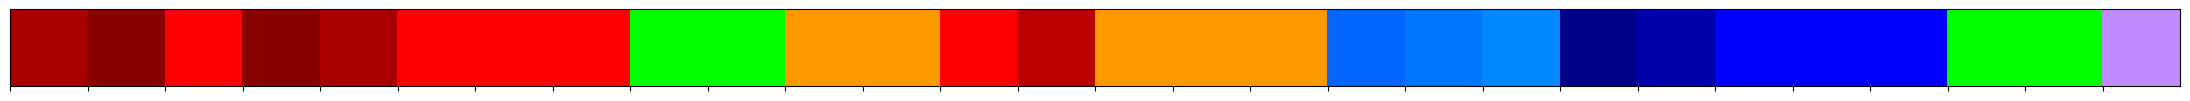

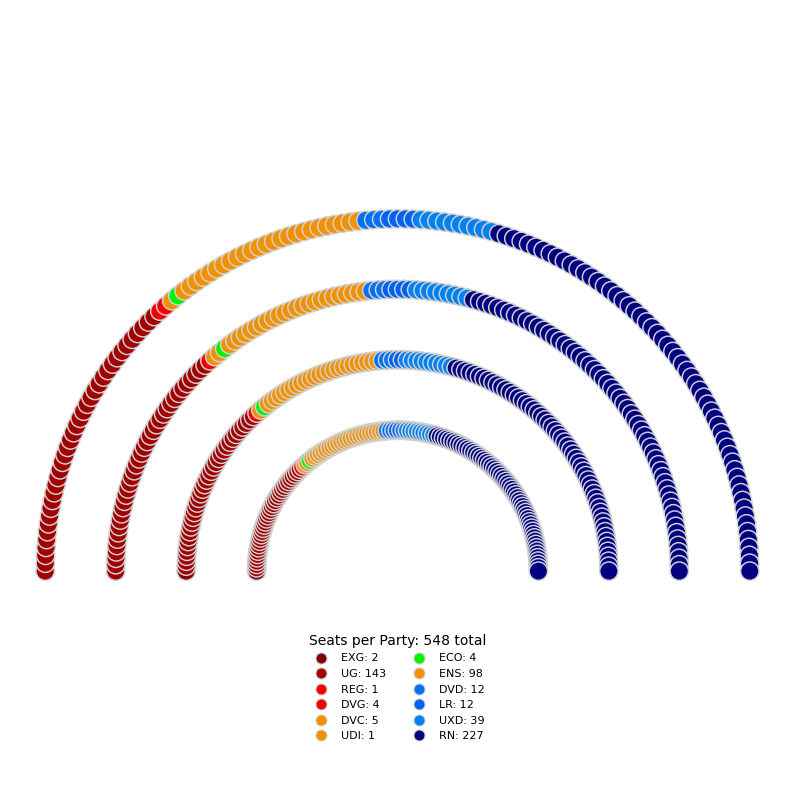

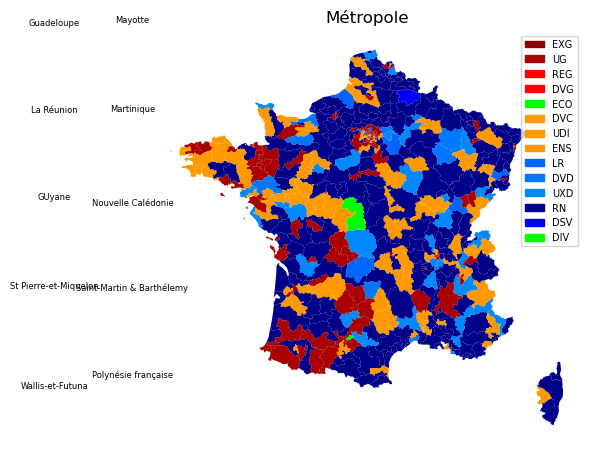

In [17]:
df_candidats = premier_tour(df_candidats, df_leg_1, df_euro, TABLE_EUROPEENNES, ALLIANCES_PARTY,TABLEAU_INDEX, POURCENTAGE_EUROPEENNNES, )
df_candidats_second = second_tour(df_candidats, TABLEAU_INDEX, ALLIANCES_PARTY, 0.05)
second_tour_votes(df_candidats, ALLIANCES_PARTY, TABLEAU_INDEX, TABLE_LIKE, df_candidats_second)
df_votes_winners = df_candidats_second["Winner"].value_counts()
print("Nombre de sièges par parti : ")
print(df_votes_winners)
if(df_candidats_second["Winner"].value_counts().iloc[0] >= 289):
    print("Majorité absolue par : ", df_candidats_second["Winner"].value_counts().idxmax() + " avec " + str(df_candidats_second["Winner"].value_counts().iloc[0]) + " sièges")
print_assemblee(df_votes_winners)
plot_map_france(df_candidats_second, gdf)

### 4.2 Retrouver une commune (circonscription) particulière, et plot la data associée

553    92006
dtype: object


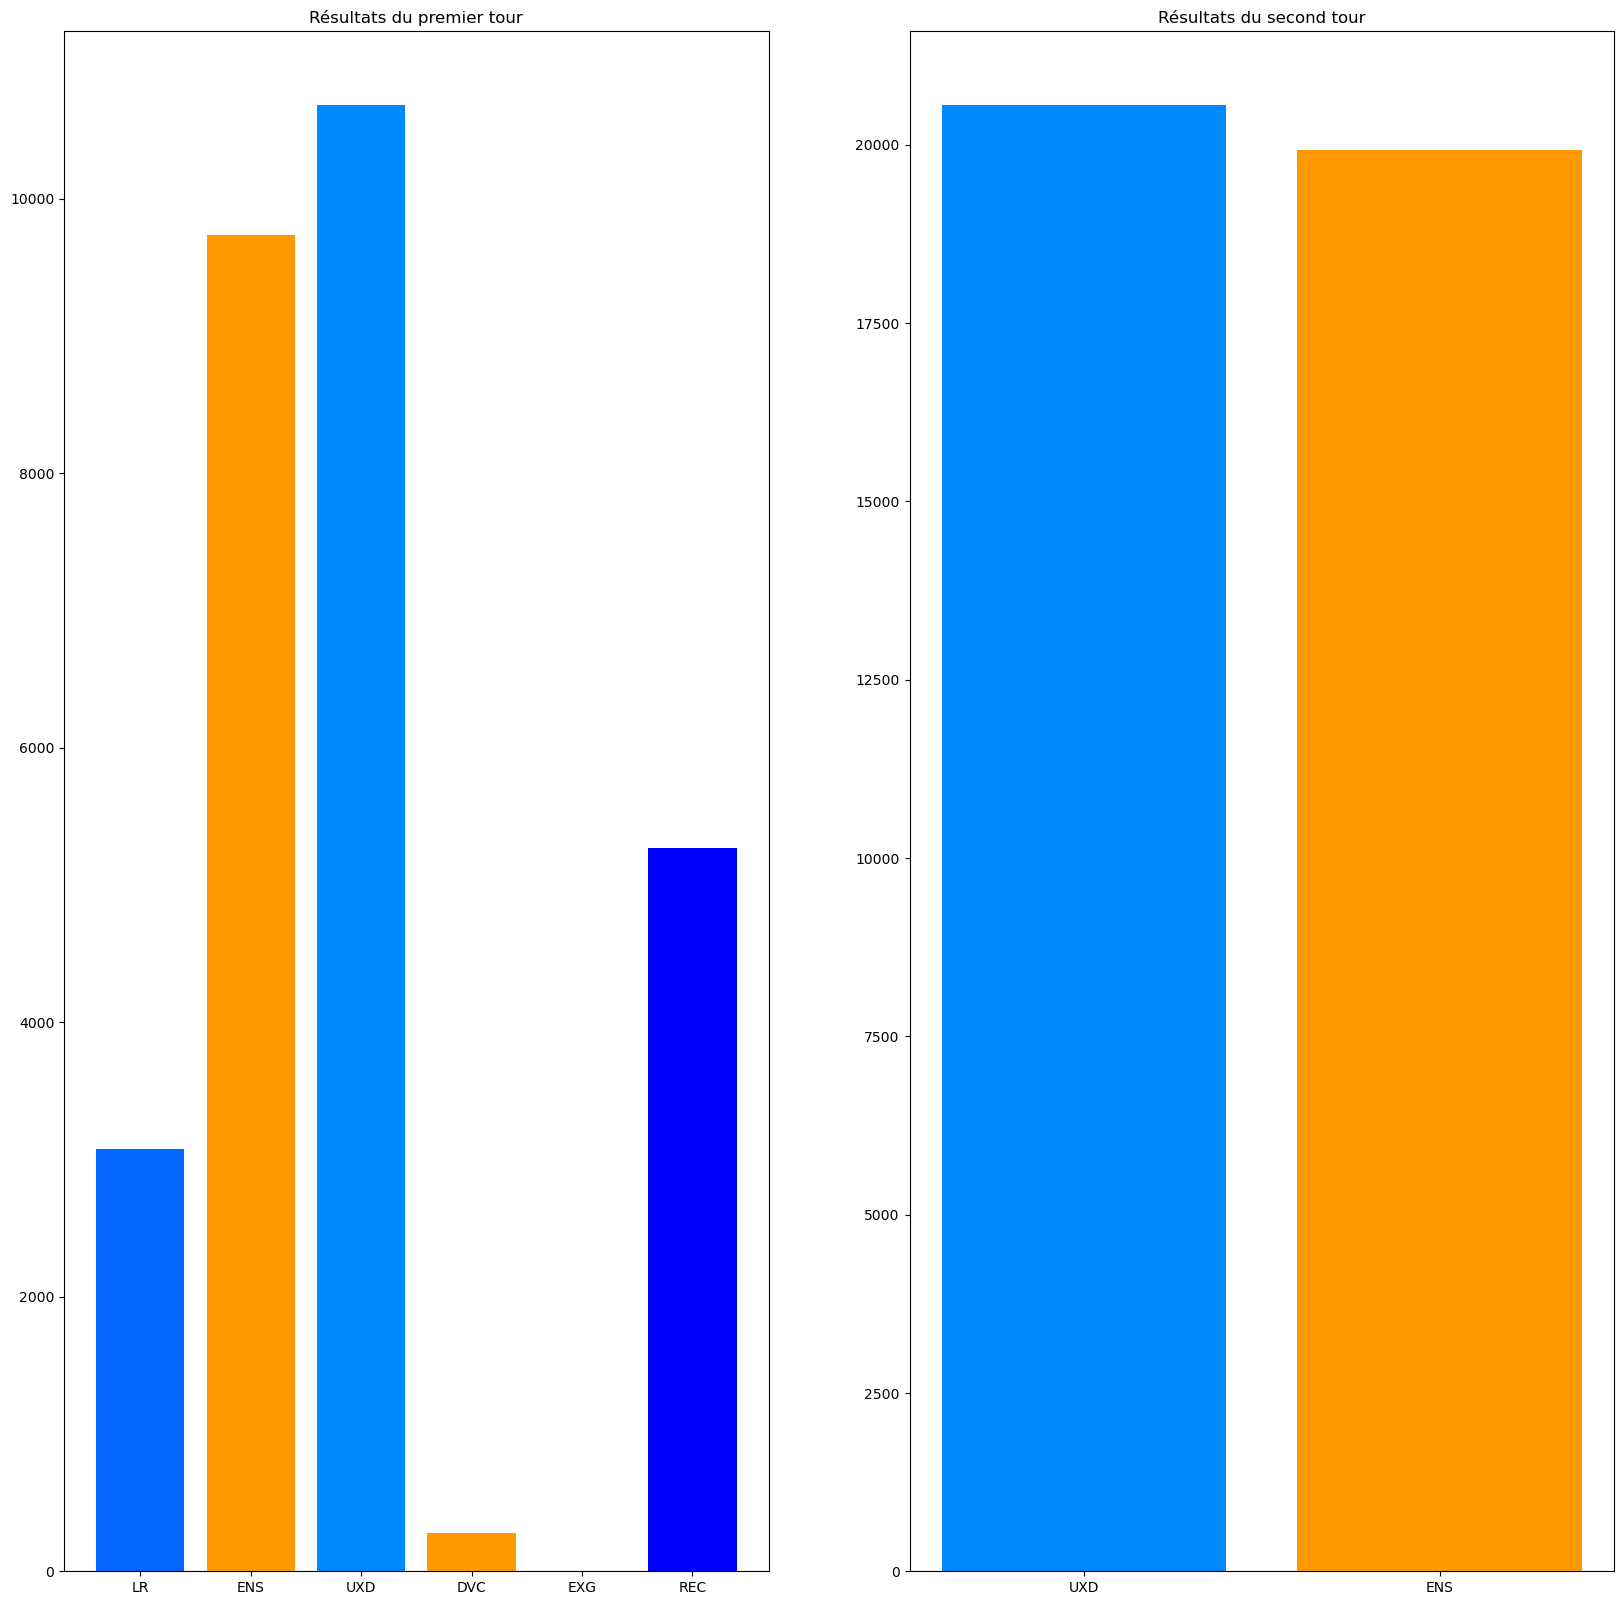

In [18]:
plot_circonscription("92200", df_candidats, df_candidats_second, df_circ_map, ALLIANCES_PARTY)